## Analyze the K-Means Clusters
> Four clusters were created from the KMeans Clustering Jupyter notebook.  The results were saved to a CSV file for further analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read CSV cluster results file
df_clusters = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/data/click_data_clusters.csv')
df_clusters.head()

,ip,app,total_clicks,click_time_range,clusters
0,114000,2,1,0,0
1,10238,28,1,0,0
2,67658,25,1,0,0
3,25071,15,2,1043,3
4,185269,3,1,0,0


In [ ]:
df_clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47284 entries, 0 to 47283
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ip                47284 non-null  int64
 1   app               47284 non-null  int64
 2   total_clicks      47284 non-null  int64
 3   click_time_range  47284 non-null  int64
 4   clusters          47284 non-null  int64
dtypes: int64(5)
memory usage: 1.8 MB


In [ ]:
cluster_0_df = df_clusters[df_clusters['clusters']==0]
cluster_1_df = df_clusters[df_clusters['clusters']==1]
cluster_2_df = df_clusters[df_clusters['clusters']==2]
cluster_3_df = df_clusters[df_clusters['clusters']==3]

In [ ]:
mean_stats = df_clusters.groupby(['clusters']).agg({"total_clicks":"mean","click_time_range":"mean"})
median_stats = df_clusters.groupby(['clusters']).agg({"total_clicks":"median","click_time_range":"median"})
min_stats = df_clusters.groupby(['clusters']).agg({"total_clicks":"min","click_time_range":"min"})
max_stats = df_clusters.groupby(['clusters']).agg({"total_clicks":"max","click_time_range":"max"})

In [ ]:
group_counts = df_clusters.groupby(['clusters']).count()['ip']

In [ ]:
from numpy.lib.function_base import median
cluster_table_df = pd.DataFrame(
    {
        "Count":group_counts.map("{:,.0f}".format),
        "Total Clicks Mean":mean_stats['total_clicks'].map("{:,.2f}".format),
        "Total Clicks Median":median_stats['total_clicks'].map("{:,.0f}".format),
        "Total Clicks Min":min_stats['total_clicks'].map("{:,.0f}".format),
        "Total Clicks Max":max_stats['total_clicks'].map("{:,.0f}".format),
        "Click Time Range Mean":mean_stats['click_time_range'].map("{:,.2f}".format),
        "Click Time Range Median":median_stats['click_time_range'].map("{:,.0f}".format),
        "Click Time Range Min":min_stats['click_time_range'].map("{:,.0f}".format),
        "Click Time Range Max":max_stats['click_time_range'].map("{:,.0f}".format)
    }
)

In [ ]:
cluster_table_df_T = cluster_table_df.T.reset_index(names=['cluster'])

In [ ]:
cluster_table_df_T.columns

Index(['cluster', 0, 1, 2, 3], dtype='object', name='clusters')

In [ ]:
cluster_table_df_T

clusters,cluster,0,1,2,3
0,Count,"43,902","1,050",962,"1,370"
1,Total Clicks Mean,1.02,2.69,4.60,2.24
2,Total Clicks Median,1,2,3,2
3,Total Clicks Min,1,2,2,2
4,Total Clicks Max,5,15,54,7
5,Click Time Range Mean,4.77,"2,060.18","3,248.83","1,049.11"
6,Click Time Range Median,0,"2,054","3,160","1,057"
7,Click Time Range Min,0,"1,556","2,658",530
8,Click Time Range Max,527,"2,654","4,295","1,554"


Cluster 0 is distinct from the other three clusters.  Cluster 0 has many more clicks than clusters 1, 2, and 3 combined.  Also, cluster 0 has a lower mean and median for the total clicks and click time range columns than the other clusters.  So, cluster 0 will be analyzed further to check for users with only one click for one app which will be referred to as one-time clicks.  There may also be users in cluster 0 who have visited many different apps and clicked each on one time.

In [ ]:
## File saved - 7/30/2023
# cluster_table_df_T.to_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/output/cluster_stats.csv', index=False)

### Cluster 0 Analysis

In [ ]:
cluster_0_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43902 entries, 0 to 47283
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ip                43902 non-null  int64
 1   app               43902 non-null  int64
 2   total_clicks      43902 non-null  int64
 3   click_time_range  43902 non-null  int64
 4   clusters          43902 non-null  int64
dtypes: int64(5)
memory usage: 2.0 MB


In [ ]:
cluster_0_df.head()

,ip,app,total_clicks,click_time_range,clusters
0,114000,2,1,0,0
1,10238,28,1,0,0
2,67658,25,1,0,0
4,185269,3,1,0,0
6,19010,12,1,0,0


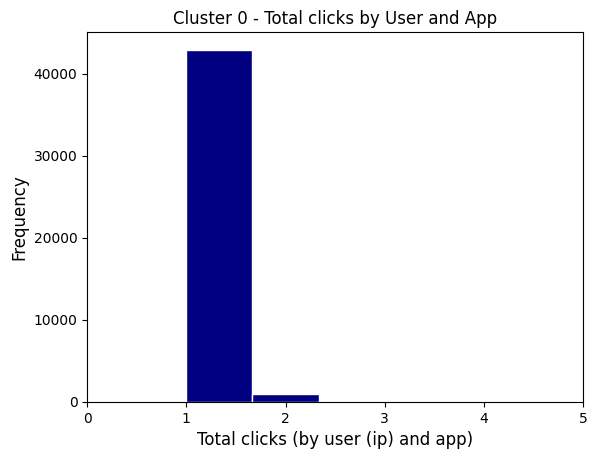

In [ ]:
plt.hist(cluster_0_df['total_clicks'], bins=6, color='navy', edgecolor="white")
plt.xlabel('Total clicks (by user (ip) and app)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Cluster 0 - Total clicks by User and App')
plt.xlim(0, 5)
plt.show()

### Aggregate Total Clicks by User (ip)

The total_clicks reflects the total number of clicks made by a user for specific apps.  The next step is to aggregate total_clicks for a user across all apps to find users who may have multiple clicks in a day spread across multiple apps.

In [ ]:
# Aggregate clicks by Ip (user)
group_total_clicks_by_ip = cluster_0_df.groupby(['ip']).count()['total_clicks']

In [ ]:
# Load group_total_clicks_by_ip into dataframe
group_total_clicks_by_ip.head()

ip
9     2
10    1
20    2
27    2
31    1
Name: total_clicks, dtype: int64

In [ ]:
# "Average Math Score":school_size_scores["Average Math Score"].
df_total_clicks_by_ip = pd.DataFrame({ "total_clicks":group_total_clicks_by_ip })

In [ ]:
df_total_clicks_by_ip.head()

,total_clicks
ip,
9,2
10,1
20,2
27,2
31,1


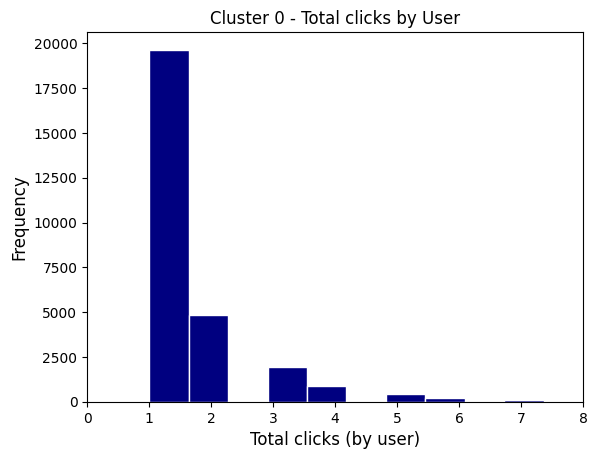

In [ ]:
plt.hist(df_total_clicks_by_ip['total_clicks'], bins=22, color='navy', edgecolor="white")
plt.xlabel('Total clicks (by user)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Cluster 0 - Total clicks by User')
plt.xlim(0, 8)
plt.show()

When the click observations are aggregated to the user (ip) level, the histogram illustrates that user click behavior of clicking many apps one time each exists.  There is also another sub-group in cluster zero of one-time clicks, which are users that click on only one app and then quickly exist.

In [ ]:
df_ip_total_clicks = df_total_clicks_by_ip.reset_index()

In [ ]:
df_ip_total_clicks.head()

,ip,total_clicks
0,9,2
1,10,1
2,20,2
3,27,2
4,31,1


In [ ]:
df_cluster_01 = df_ip_total_clicks.query("total_clicks == 1")

In [ ]:
df_cluster_01.describe()

,ip,total_clicks
count,13703.000000,13703.0
mean,124801.709991,1.0
std,88373.738876,0.0
min,10.000000,1.0
25%,54296.000000,1.0
50%,108207.000000,1.0
75%,181982.000000,1.0
max,364744.000000,1.0


In [ ]:
# Save cluster_0 records to CSV file for the new sample data set
# df_cluster_0.to_csv('data/cluster_0.csv', index=False)

In [ ]:
## File saved - 7/29/2023 10:07 pm
# df_cluster_01.to_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/output/cluster_0-1.csv', index=False)

### Merge clusters DataFrame to sample_data_modeling.csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/data/sample_data_modeling.csv')

In [ ]:
df['click_time'] = pd.to_datetime(df['click_time'])
df['click_date'] = pd.to_datetime(df['click_date'])

In [ ]:
df['is_attributed'].value_counts()

0    46184
1     9065
Name: is_attributed, dtype: int64

In [ ]:
df_new = df.join(df_clusters.set_index(['ip', 'app']), on=['ip', 'app'])
df_new['clusters'].value_counts()

0    44926
2     4427
3     3068
1     2828
Name: clusters, dtype: int64

### One-hot encode clusters column

In [ ]:
# Create dummy variables for clusters column
df_new = df_new.join(pd.get_dummies(df_new['clusters']))
df_new.head()

,ip,app,device,os,channel,click_time,is_attributed,click_date,median_time_diff_app,median_time_diff_channel,...,os_encoded,device_encoded,ctr,total_clicks,click_time_range,clusters,0,1,2,3
0,122711,18,3032,607,107,2017-11-07 07:53:42,0,2017-11-07,0.0,0.0,...,0.073733,0.005076,0.0,1,0,0,1,0,0,0
1,34908,1,1,13,153,2017-11-08 10:16:45,0,2017-11-08,0.0,0.0,...,0.101253,0.120761,0.0,1,0,0,1,0,0,0
2,160717,64,1,41,459,2017-11-07 02:57:42,0,2017-11-07,0.0,0.0,...,0.067771,0.120761,0.0,1,0,0,1,0,0,0
3,104366,6,1,19,125,2017-11-06 23:28:14,0,2017-11-06,0.0,0.0,...,0.122982,0.120761,0.0,1,0,0,1,0,0,0
4,43895,18,1,19,439,2017-11-09 09:10:47,0,2017-11-09,0.0,0.0,...,0.122982,0.120761,0.0,1,0,0,1,0,0,0


In [ ]:
df_new.columns

Index([                      'ip',                      'app',
                         'device',                       'os',
                        'channel',               'click_time',
                  'is_attributed',               'click_date',
           'median_time_diff_app', 'median_time_diff_channel',
                           'hour',                   'minute',
                    'hour_0_to_8',             'hour_8_to_16',
                  'hour_16_to_24',              'app_encoded',
                'channel_encoded',               'os_encoded',
                 'device_encoded',                      'ctr',
                   'total_clicks',         'click_time_range',
                       'clusters',                          0,
                                1,                          2,
                                3],
      dtype='object')

In [ ]:
# rename columns
df_new.rename(columns={0:'cluster_0',
                       1:'cluster_1',
                       2:'cluster_2',
                       3:'cluster_3'
                       },
              inplace=True)

In [ ]:
df_new.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed',
       'click_date', 'median_time_diff_app', 'median_time_diff_channel',
       'hour', 'minute', 'hour_0_to_8', 'hour_8_to_16', 'hour_16_to_24',
       'app_encoded', 'channel_encoded', 'os_encoded', 'device_encoded', 'ctr',
       'total_clicks', 'click_time_range', 'clusters', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3'],
      dtype='object')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55249 entries, 0 to 55248
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ip                        55249 non-null  int64         
 1   app                       55249 non-null  int64         
 2   device                    55249 non-null  int64         
 3   os                        55249 non-null  int64         
 4   channel                   55249 non-null  int64         
 5   click_time                55249 non-null  datetime64[ns]
 6   is_attributed             55249 non-null  int64         
 7   click_date                55249 non-null  datetime64[ns]
 8   median_time_diff_app      55249 non-null  float64       
 9   median_time_diff_channel  55249 non-null  float64       
 10  hour                      55249 non-null  int64         
 11  minute                    55249 non-null  int64         
 12  hour_0_to_8       

In [ ]:
# save to csv file
df_new.to_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/output/sample_data_modeling.csv', index=False)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DSC-680 Capstone/output/sample_data_modeling.csv')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55249 entries, 0 to 55248
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ip                        55249 non-null  int64  
 1   app                       55249 non-null  int64  
 2   device                    55249 non-null  int64  
 3   os                        55249 non-null  int64  
 4   channel                   55249 non-null  int64  
 5   click_time                55249 non-null  object 
 6   is_attributed             55249 non-null  int64  
 7   click_date                55249 non-null  object 
 8   median_time_diff_app      55249 non-null  float64
 9   median_time_diff_channel  55249 non-null  float64
 10  hour                      55249 non-null  int64  
 11  minute                    55249 non-null  int64  
 12  hour_0_to_8               55249 non-null  int64  
 13  hour_8_to_16              55249 non-null  int64  
 14  hour_1

## References
> https://github.com/mwalbers1/Data-Analytics-Bootcamp/blob/main/school-district-analysis/PyCitySchools_Challenge.ipynb
>
>
> https://github.com/mwalbers1/Data-Analyst-Projects/blob/52f8d5b273725102f7e6fee47bde62c4a79b429f/AB%20Testing/Analyze_ab_test_results_notebook.ipynb
